# Prepare Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
#from tqdm import tqdm
np.random.seed(0)
random.seed(0)

In [2]:
data1 = pd.read_csv('gt/gt_2011.csv')
data2 = pd.read_csv('gt/gt_2012.csv')
data3 = pd.read_csv('gt/gt_2013.csv')
data4 = pd.read_csv('gt/gt_2014.csv')
data5 = pd.read_csv('gt/gt_2015.csv')

In [3]:
data1['year'] = 2011
data2['year'] = 2012
data3['year'] = 2013
data4['year'] = 2014
data5['year'] = 2015
data = pd.concat([data1, data2,data3,data4,data5], ignore_index=True)
data['year']= data['year'].astype(str)
data.shape

(36733, 12)

In [4]:
data.head(10)
data.drop('NOX', axis=1, inplace=True)
data = data[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY','CDP', 'year','CO']]
print('shape:', data.shape)
data.info()

shape: (36733, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   year    36733 non-null  object 
 10  CO      36733 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.1+ MB


In [5]:
#Im predicting CO
data.head(10)

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3  3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4  3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
5  3.8858  1017.7  83.946  3.5824  23.903  1086.0  549.98  134.67  11.868   
6  3.6697  1018.0  84.114  3.5804  23.889  1085.9  550.04  134.68  11.877   
7  3.5892  1018.2  83.867  3.5777  23.876  1086.0  549.88  134.66  11.893   
8  3.7108  1018.5  84.948  3.6027  23.957  1086.3  549.98  134.65  11.870   
9  4.8281  1018.5  85.346  3.5158  23.422  1083.1  549.80  132.67  11.694   

   year       CO  
0  2011  0.32663  
1  2011  0.44784  
2  2011  0.45144  
3  2011  0.23107  
4  2011  0.26747  
5  2011  0.23473  
6  2011  0.44412  
7  2011  0.79996  
8  2011  0.68996  
9  2011  1.02810

# Question 1

In [6]:
categorical_features = ['year']

In [7]:
from sklearn.preprocessing import StandardScaler

#numerize all categorical data
data_copy = data.copy()
for i in categorical_features:
    cat_arr = list(data_copy[i].unique())
    len_ = len(data_copy[i].value_counts())
    data_copy[i].replace(cat_arr,[n for n in range(1, len_+1)], inplace=True)

scaler = StandardScaler()
gas_X = data_copy.drop('CO', axis=1) # remove the target
gas_X_std = scaler.fit_transform(gas_X)
gas_std = scaler.fit_transform(data_copy)
gas_y_std = gas_std[:, -1]

# Question 2

In [8]:
from pandas.plotting import scatter_matrix

corr_matrix = data_copy.corr()
corr_matrix

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.406601 -0.476291  0.251974  0.045851  0.183706  0.281869   
AP   -0.406601  1.000000 -0.015184 -0.040363  0.057533 -0.005390 -0.225601   
AH   -0.476291 -0.015184  1.000000 -0.147840 -0.235153 -0.221809  0.022965   
AFDP  0.251974 -0.040363 -0.147840  1.000000  0.678485  0.691292 -0.466882   
GTEP  0.045851  0.057533 -0.235153  0.678485  1.000000  0.874234 -0.699703   
TIT   0.183706 -0.005390 -0.221809  0.691292  0.874234  1.000000 -0.380862   
TAT   0.281869 -0.225601  0.022965 -0.466882 -0.699703 -0.380862  1.000000   
TEY  -0.091152  0.118224 -0.137360  0.665483  0.964127  0.910297 -0.682396   
CDP   0.015287  0.102636 -0.196275  0.702568  0.978470  0.908469 -0.706438   
year  0.000217  0.018595 -0.177964 -0.254326  0.050643 -0.125743  0.116287   
CO   -0.174326  0.067050  0.106586 -0.448425 -0.518909 -0.706275  0.058353   

           TEY       CDP      year        CO  
AT   -0.091152  0.015287  0.000217 -0.174326  
AP    0.118224  0.102636  0.018595  0.067050  
AH   -0.137360 -0.196275 -0.177964  0.106586  
AFDP  0.665483  0.702568 -0.254326 -0.448425  
GTEP  0.964127  0.978470  0.050643 -0.518909  
TIT   0.910297  0.908469 -0.125743 -0.706275  
TAT  -0.682396 -0.706438  0.116287  0.058353  
TEY   1.000000  0.988778 -0.029414 -0.569813  
CDP   0.988778  1.000000 -0.025415 -0.551027  
year -0.029414 -0.025415  1.000000  0.178450  
CO   -0.569813 -0.551027  0.178450  1.000000

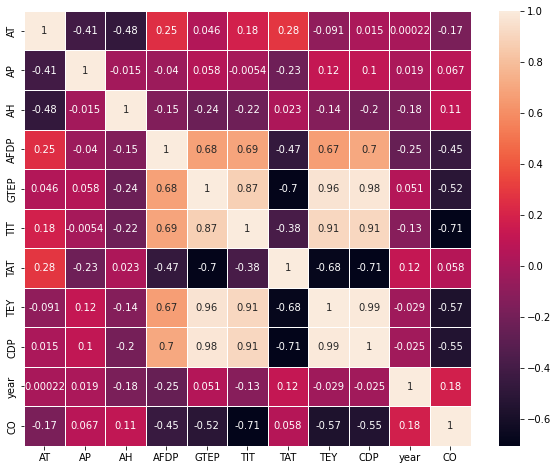

In [9]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, linewidth=0.5)

# Question 3

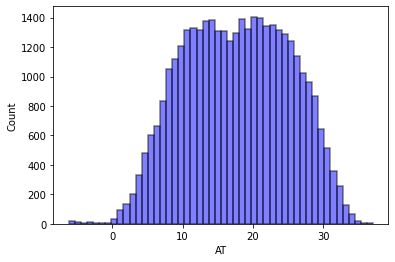

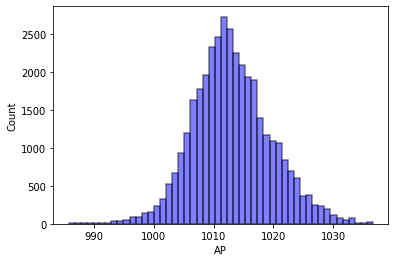

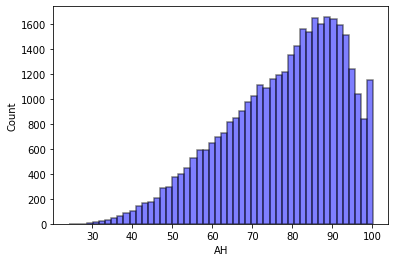

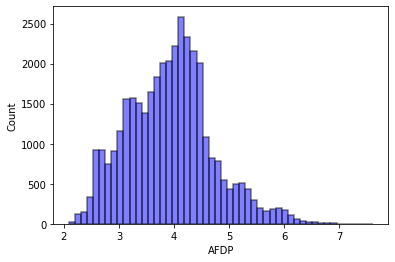

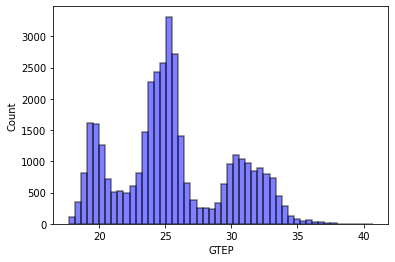

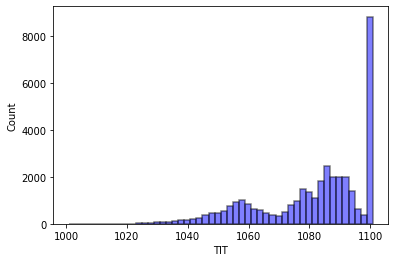

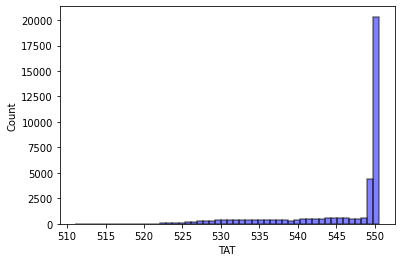

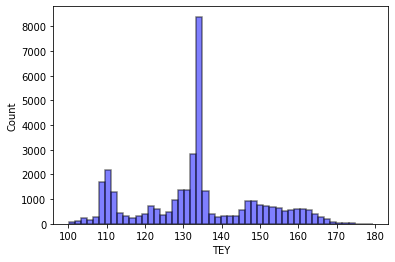

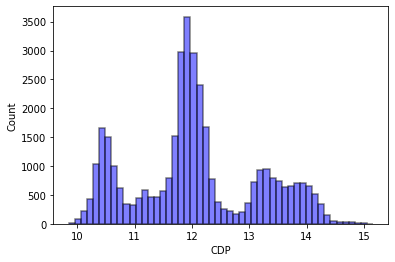

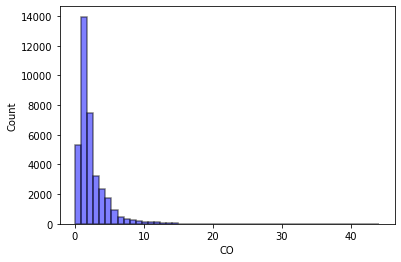

In [10]:
numerical = data.drop(categorical_features, axis=1)

for i in range(numerical.shape[1]):
    plt.figure()
    plt.hist(numerical.iloc[:,i], bins=50, edgecolor='k', facecolor='b', linewidth=1.5, alpha=0.5)
    plt.xlabel(numerical.columns[i])
    plt.ylabel('Count')
    plt.show()

# Question 4

In [11]:
categorical = data[categorical_features]

C:\Users\ericz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


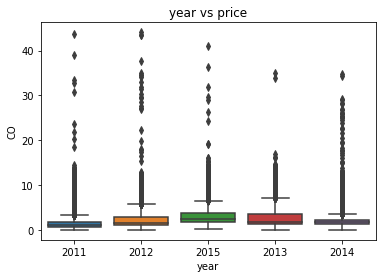

In [12]:
gas_y = data_copy['CO'] # extract the target
for i in categorical_features:
    sns.boxplot(categorical[i], gas_y, order=list(set(categorical[i])))
    plt.title(i +' vs '+ 'price')
    plt.show()

# Question 6

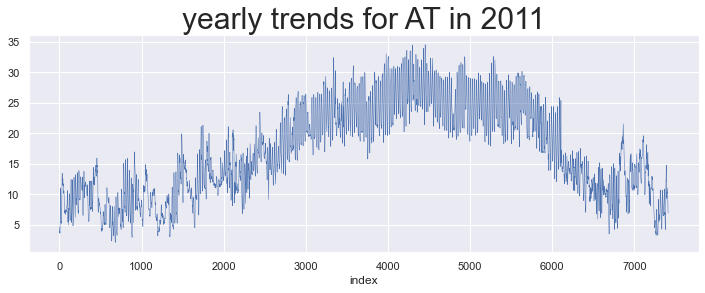

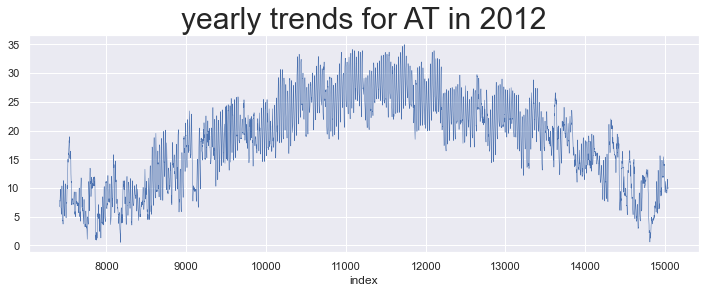

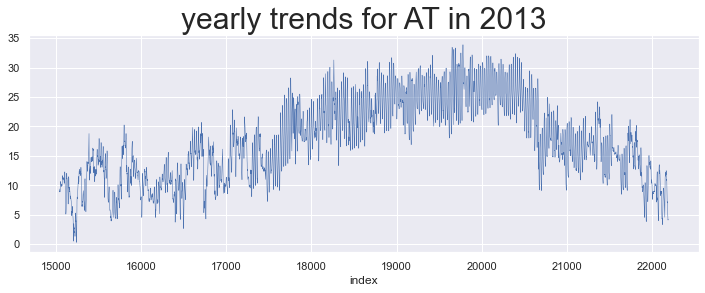

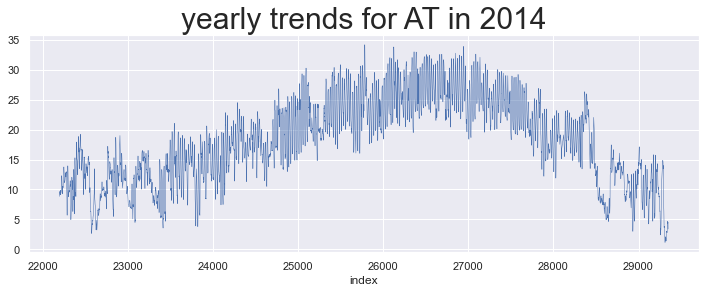

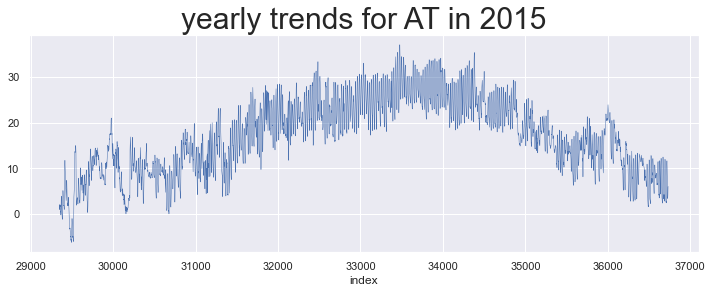

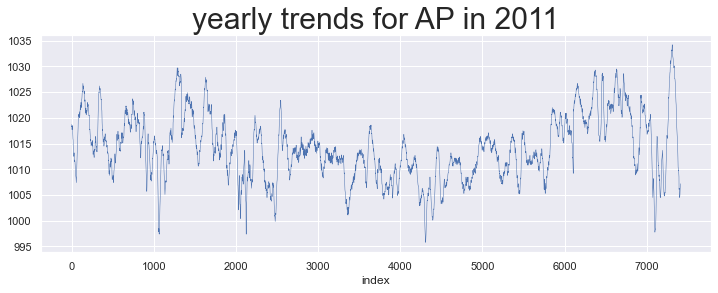

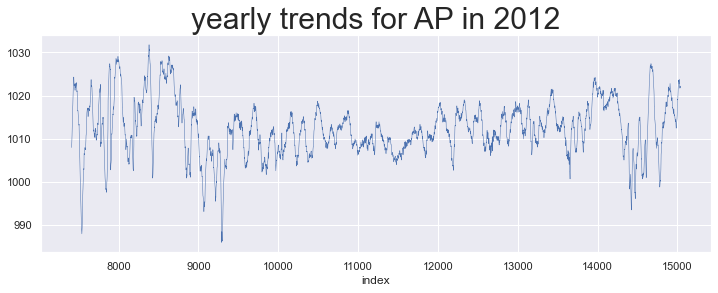

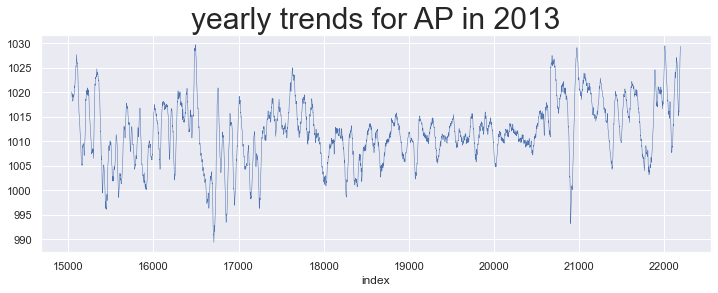

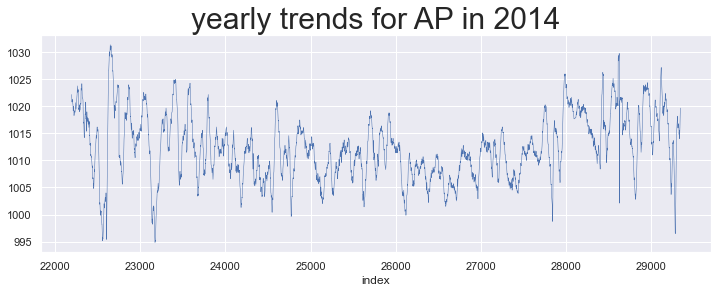

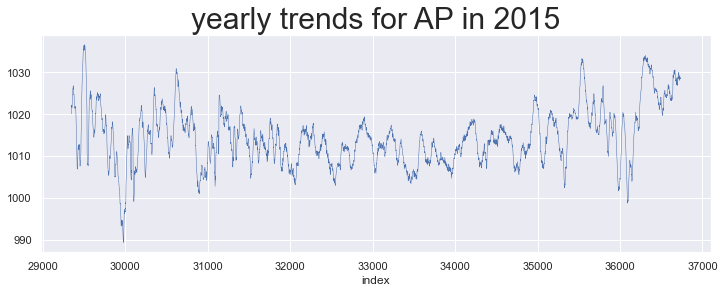

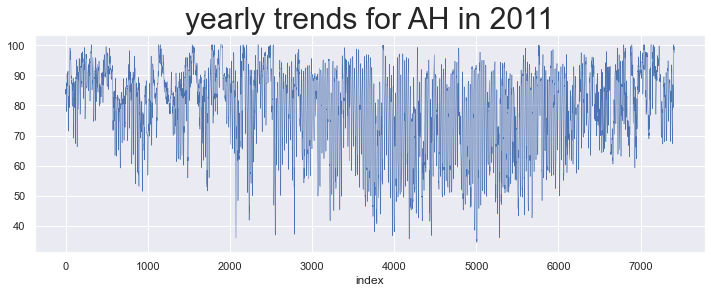

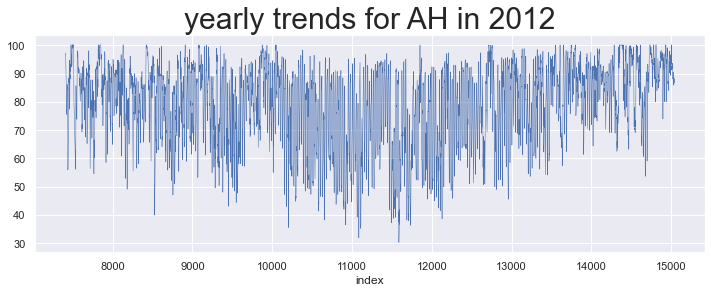

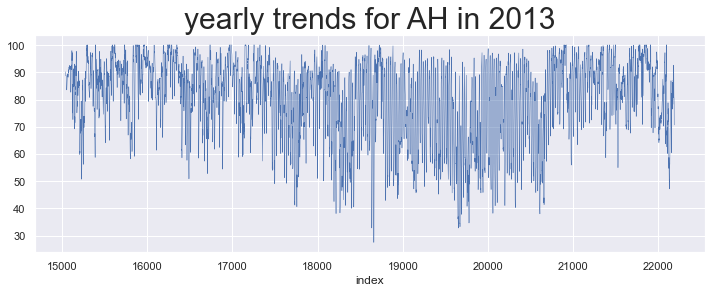

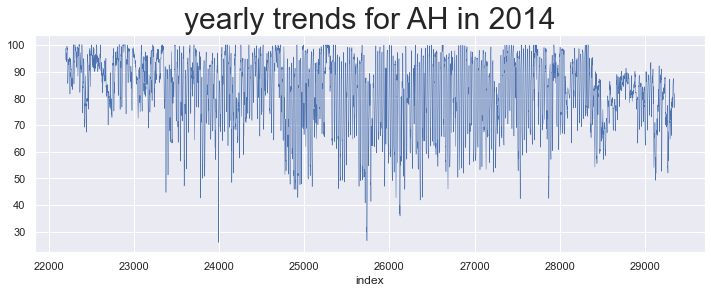

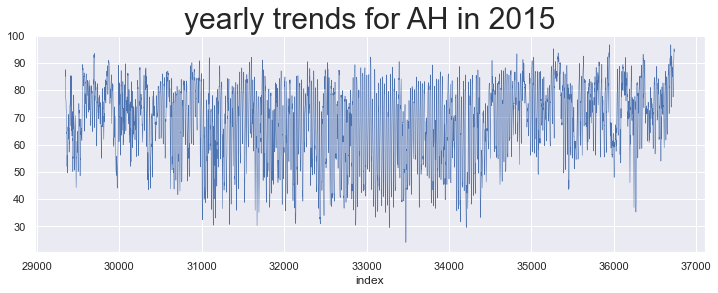

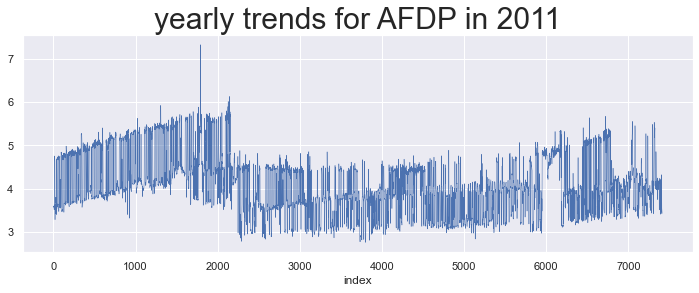

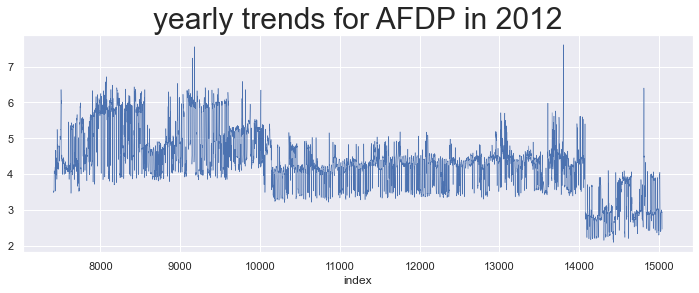

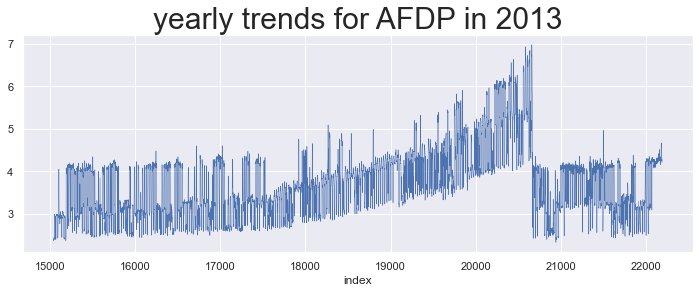

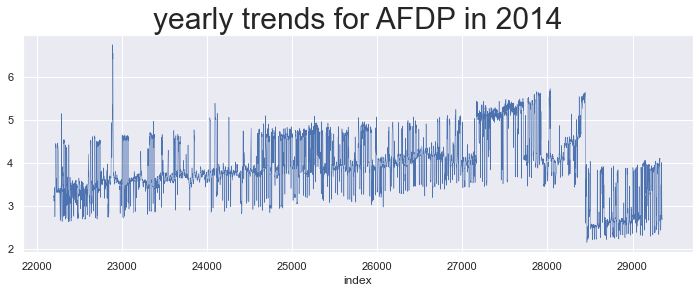

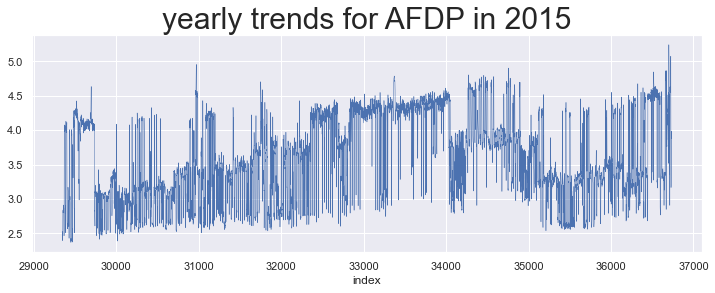

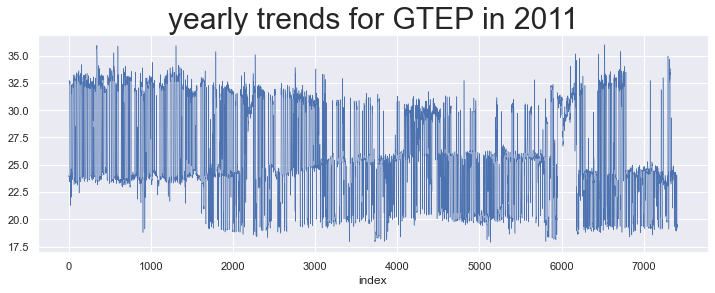

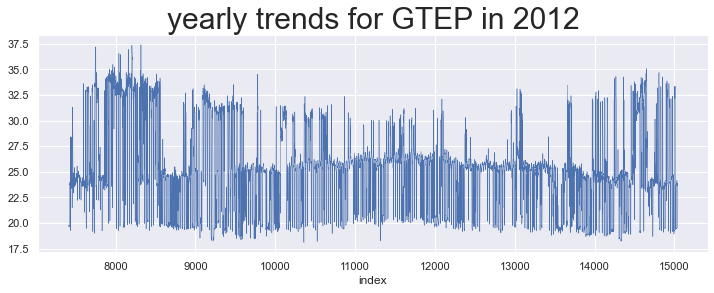

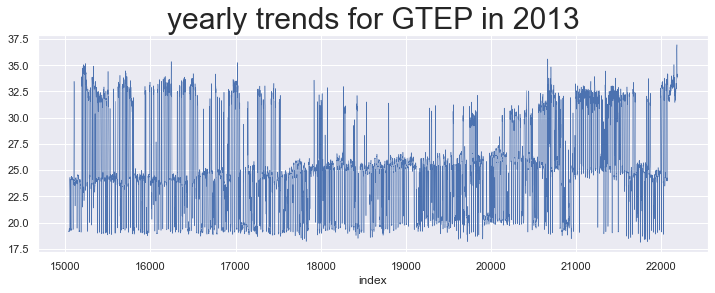

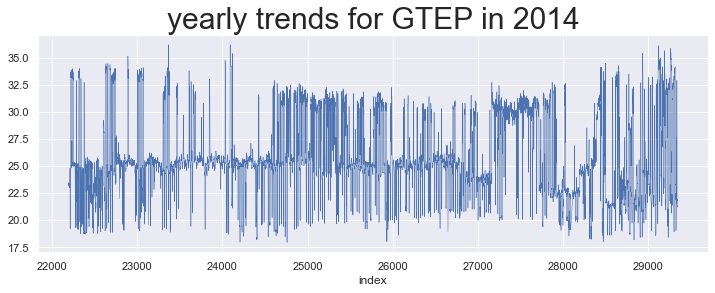

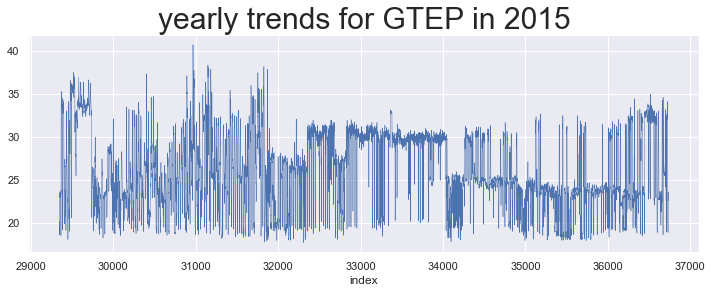

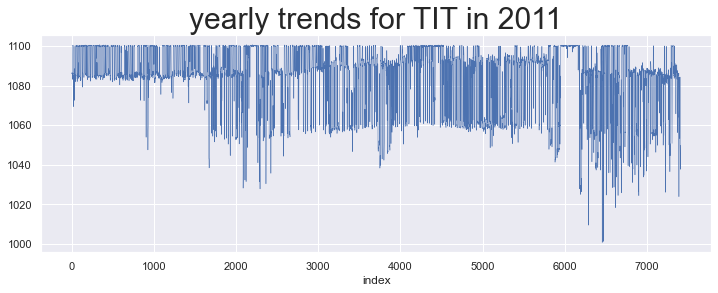

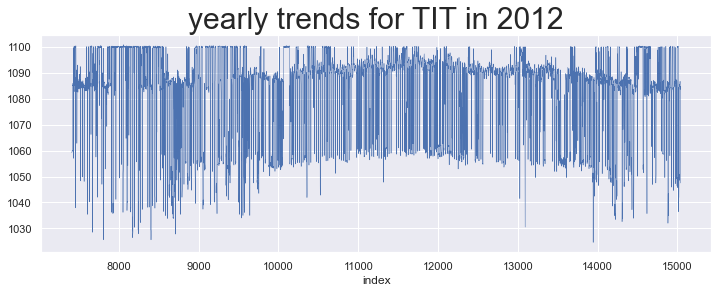

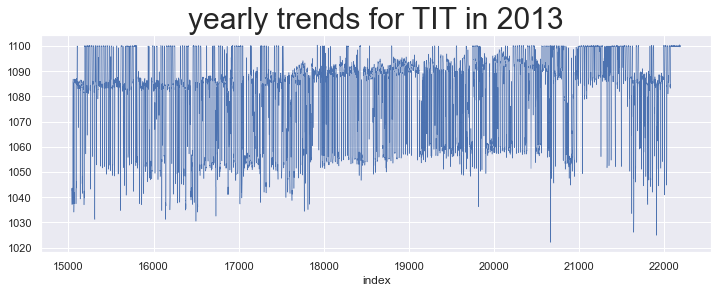

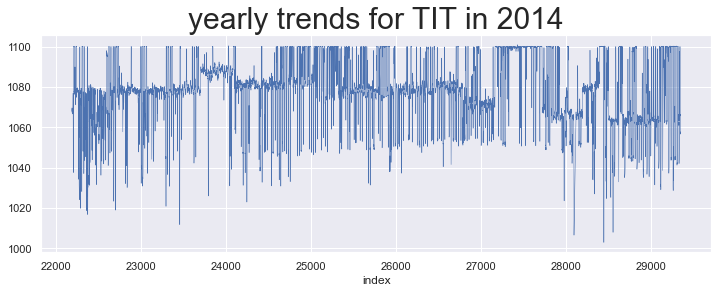

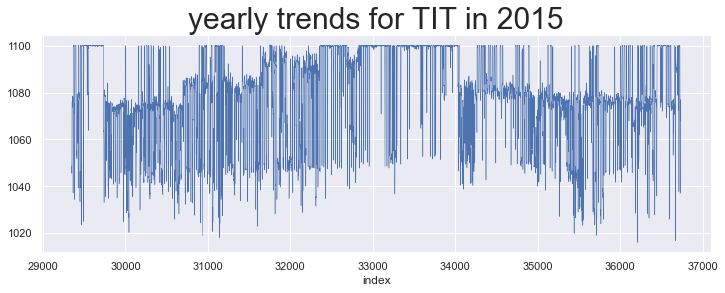

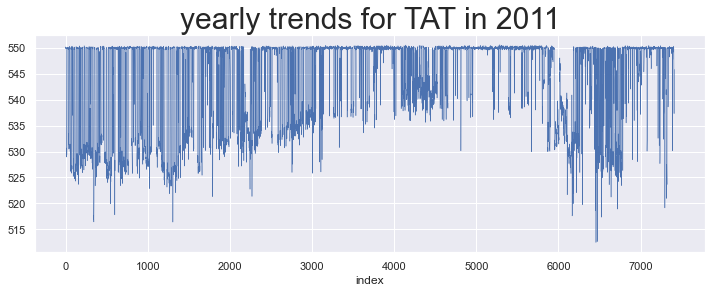

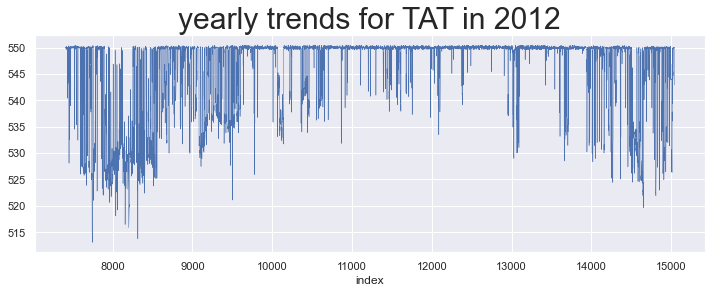

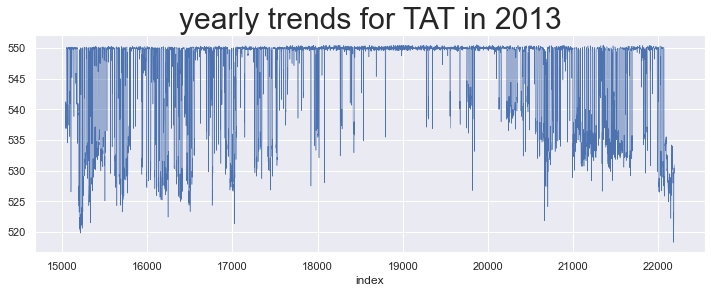

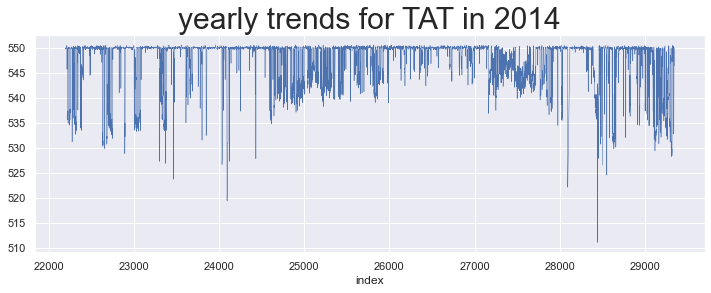

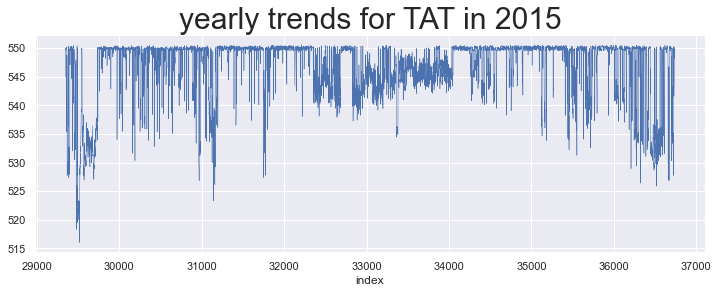

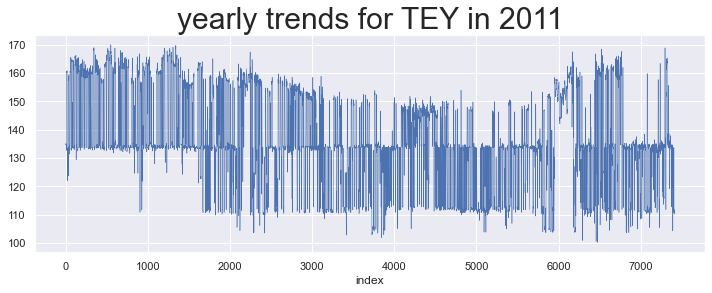

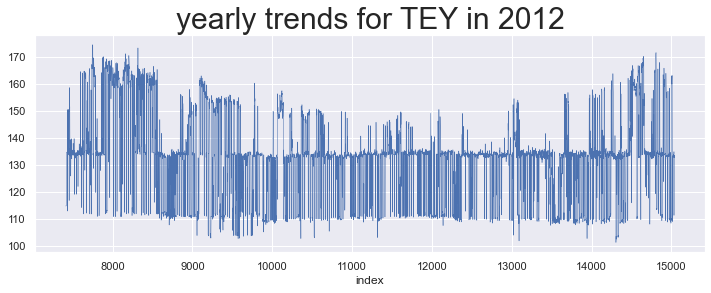

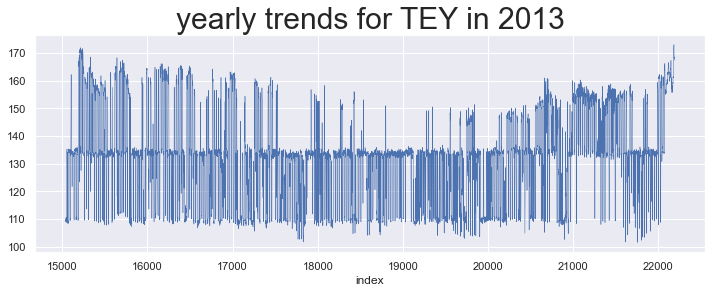

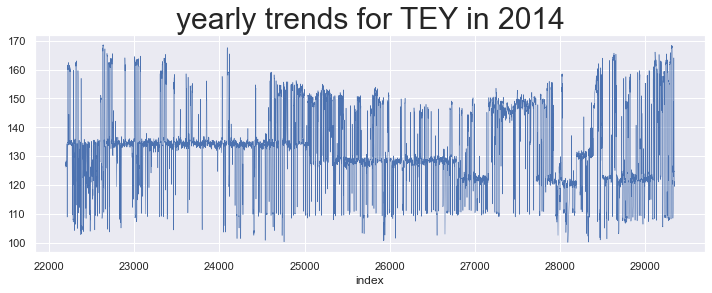

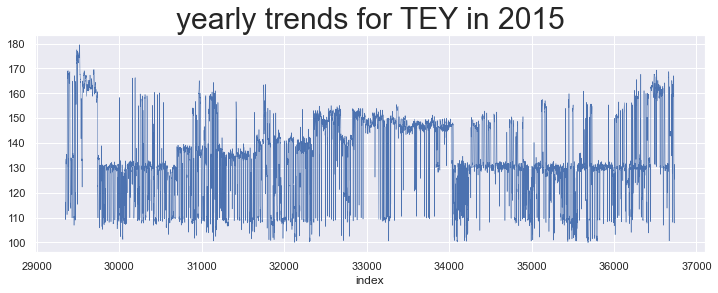

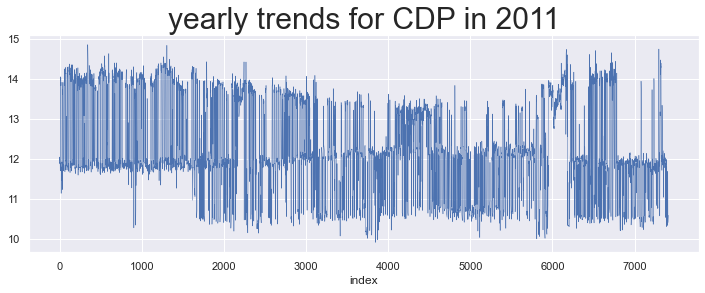

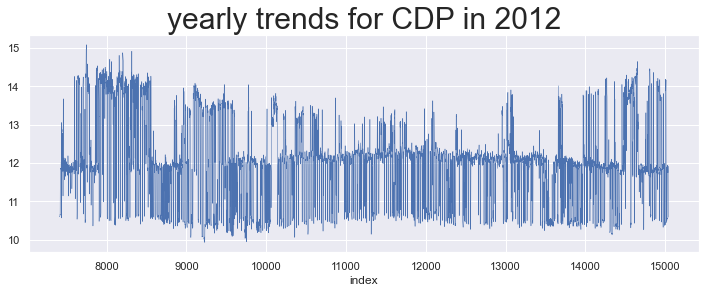

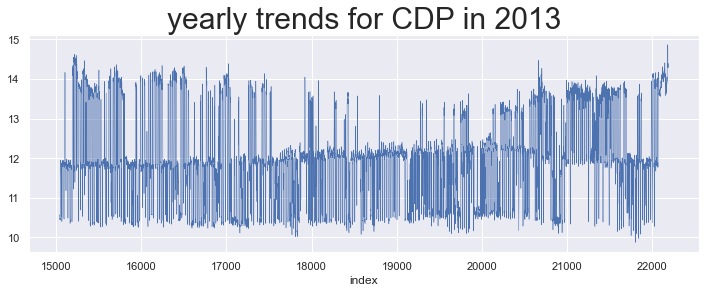

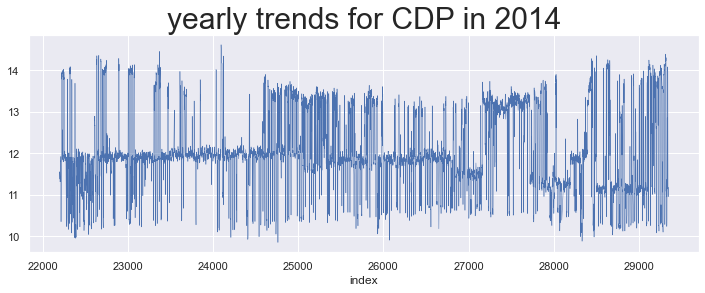

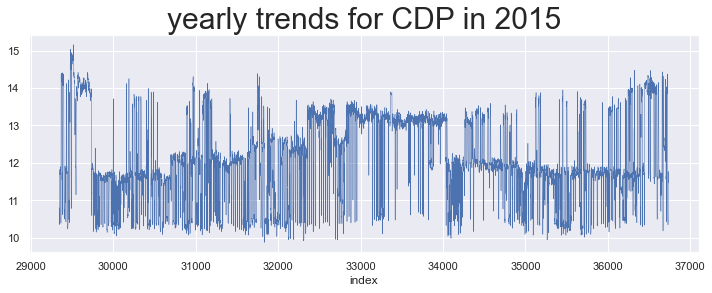

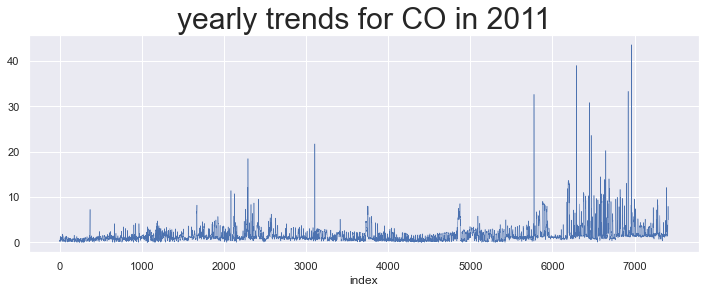

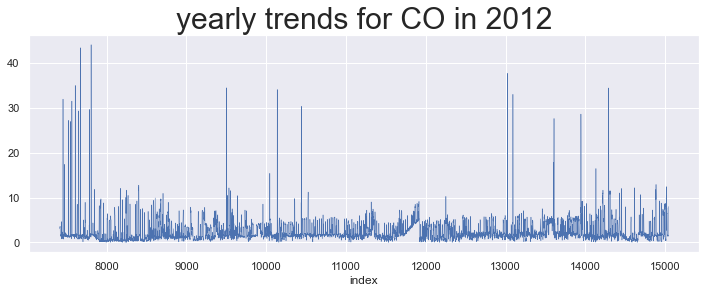

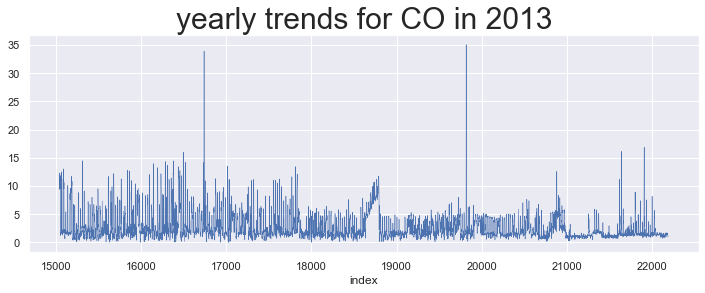

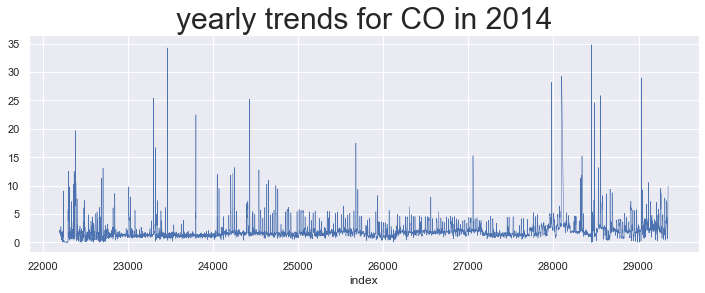

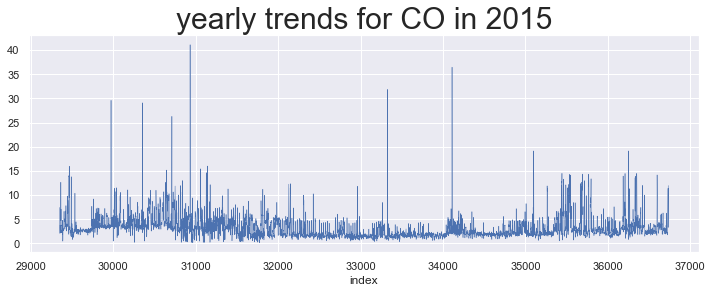

In [13]:
data['index']=data.index
data = data.reset_index(drop=True)

lst = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY','CDP','CO']
year =  ['2011', '2012', '2013', '2014', '2015']
data_time = data.set_index('index')
        
for i in range(len(lst)):
    for j in range(len(year)):
        sns.set(rc={'figure.figsize':(12, 4)})
        data_year = data_time.loc[data_time['year'] == year[j]]
        data_year[lst[i]].plot(linewidth=0.5)
        plt.title('yearly trends for ' + lst[i] + ' in ' + year[j], fontsize=30)
        plt.show()


# Question 7

In [14]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression

MutualInfo_std = mutual_info_regression(gas_X_std, gas_y_std)
Fscore_std = f_regression(gas_X_std, gas_y_std)

In [15]:
gas_X_nostd = gas_X.to_numpy()
MutualInfo_nostd = mutual_info_regression(gas_X_nostd, gas_y)
Fscore_nostd = f_regression(gas_X_nostd, gas_y)

In [16]:
top6_MI_std = np.argsort(MutualInfo_std)[::-1][:6]
top6_FS_std = np.argsort(Fscore_std[0])[::-1][:6]
gas_X_std_top6_MI = gas_X.iloc[:, top6_MI_std]
gas_X_std_top6_FS = gas_X.iloc[:, top6_FS_std]

top6_MI_nostd = np.argsort(MutualInfo_nostd)[::-1][:6]
top6_FS_nostd = np.argsort(Fscore_nostd[0])[::-1][:6]
gas_X_nostd_top6_MI = gas_X.iloc[:, top6_MI_nostd]
gas_X_nostd_top6_FS = gas_X.iloc[:, top6_FS_nostd]

In [17]:
gas_X.columns[top6_MI_std]

Index(['TIT', 'TEY', 'CDP', 'GTEP', 'AFDP', 'TAT'], dtype='object')

In [18]:
gas_X.columns[top6_FS_std]

Index(['TIT', 'TEY', 'CDP', 'GTEP', 'AFDP', 'year'], dtype='object')

In [19]:
gas_X.columns[top6_MI_nostd]

Index(['TIT', 'TEY', 'CDP', 'GTEP', 'AFDP', 'TAT'], dtype='object')

In [20]:
gas_X.columns[top6_FS_nostd]

Index(['TIT', 'TEY', 'CDP', 'GTEP', 'AFDP', 'year'], dtype='object')

# Question 8-10

In [21]:
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

linear = LinearRegression()

lr_train_score = []
lr_test_score = []
gas_important_X = [gas_X_nostd_top6_MI, gas_X_std_top6_MI, gas_X_nostd_top6_FS, gas_X_std_top6_FS]


for X in gas_important_X:
    cv_results = cross_validate(linear, X, gas_y_std, scoring='neg_root_mean_squared_error', return_train_score=True, cv=10)
    lr_train_score.append(np.mean(cv_results['train_score']))
    lr_test_score.append(np.mean(cv_results['test_score']))

lr_results = pd.DataFrame(data={'mean_test_score': lr_test_score, 'mean_train_score': lr_train_score,
                                'param_model': 'LinearRegression()', 'param_model__alpha': 'N/A', 
                                'Standardize': [False, True, False, True], 
                                'Feature Selection': ['Mutual Information', 'Mutual Information', 'F Scores', 'F Scores']})

lr_results 

mean_test_score  mean_train_score         param_model param_model__alpha  \
0        -0.700737         -0.662187  LinearRegression()                N/A   
1        -0.700737         -0.662187  LinearRegression()                N/A   
2        -0.701939         -0.666380  LinearRegression()                N/A   
3        -0.701939         -0.666380  LinearRegression()                N/A   

   Standardize   Feature Selection  
0        False  Mutual Information  
1         True  Mutual Information  
2        False            F Scores  
3         True            F Scores

In [22]:
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
import time

time_start =time.time()

cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=False)

ridge = Ridge(random_state=0, max_iter=3000)
lasso = Lasso(random_state=0, max_iter=3000)

pipe = Pipeline([('model', linear)],memory=memory)

param_grid = {
    'model': [ridge, lasso],
    'model__alpha': [10.0**x for x in range(-3,3)]
}

grid1 = GridSearchCV(pipe,cv=10,param_grid=param_grid,scoring='neg_root_mean_squared_error',return_train_score=True)
grid1.fit(gas_X_nostd_top6_MI, gas_y)

grid2 = GridSearchCV(pipe,cv=10,param_grid=param_grid,scoring='neg_root_mean_squared_error',return_train_score=True)
grid2.fit(gas_X_std_top6_MI, gas_y_std)

grid3 = GridSearchCV(pipe,cv=10,param_grid=param_grid,scoring='neg_root_mean_squared_error',return_train_score=True)
grid3.fit(gas_X_nostd_top6_FS, gas_y)

grid4 = GridSearchCV(pipe,cv=10,param_grid=param_grid,scoring='neg_root_mean_squared_error',return_train_score=True)
grid4.fit(gas_X_std_top6_FS, gas_y_std)

rmtree(cachedir)
print('\nTime to run code: {}'.format(time.time()-time_start))


Time to run code: 52.0312066078186


In [23]:
lr_reg_result1 = pd.DataFrame(grid1.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model', 'param_model__alpha']]
lr_reg_result1['Standardize'] = False
lr_reg_result1['Feature Selection'] = 'Mutual Information'

lr_reg_result2 = pd.DataFrame(grid2.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model', 'param_model__alpha']]
lr_reg_result2['Standardize'] = True
lr_reg_result2['Feature Selection'] = 'Mutual Information'

lr_reg_result3 = pd.DataFrame(grid3.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model', 'param_model__alpha']]
lr_reg_result3['Standardize'] = False
lr_reg_result3['Feature Selection'] = 'F Scores'

lr_reg_result4 = pd.DataFrame(grid4.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model', 'param_model__alpha']]
lr_reg_result4['Standardize'] = True
lr_reg_result4['Feature Selection'] = 'F Scores'

results = pd.concat([lr_results, lr_reg_result1, lr_reg_result2, lr_reg_result3, lr_reg_result4])
results = results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
results.head(20)

mean_test_score  mean_train_score  \
0         -0.686283         -0.668333   
1         -0.692270         -0.671415   
2         -0.692991         -0.663978   
3         -0.693904         -0.680845   
4         -0.694697         -0.666765   
5         -0.696901         -0.662292   
6         -0.698718         -0.662278   
7         -0.698806         -0.666455   
8         -0.700152         -0.662189   
9         -0.700675         -0.662187   
10        -0.700730         -0.662187   
11        -0.700736         -0.662187   
12        -0.700736         -0.662187   
13        -0.700737         -0.662187   
14        -0.700737         -0.662187   
15        -0.700779         -0.666386   
16        -0.701816         -0.666380   
17        -0.701926         -0.666380   
18        -0.701937         -0.666380   
19        -0.701939         -0.666380   

                                         param_model param_model__alpha  \
0   Lasso(alpha=0.01, max_iter=3000, random_state=0)                0.1   
1   Lasso(alpha=0.01, max_iter=3000, random_state=0)               0.01   
2   Lasso(alpha=0.01, max_iter=3000, random_state=0)               0.01   
3   Lasso(alpha=0.01, max_iter=3000, random_state=0)                0.1   
4               Ridge(max_iter=3000, random_state=0)              100.0   
5               Ridge(max_iter=3000, random_state=0)              100.0   
6   Lasso(alpha=0.01, max_iter=3000, random_state=0)              0.001   
7   Lasso(alpha=0.01, max_iter=3000, random_state=0)              0.001   
8               Ridge(max_iter=3000, random_state=0)               10.0   
9               Ridge(max_iter=3000, random_state=0)                1.0   
10              Ridge(max_iter=3000, random_state=0)                0.1   
11              Ridge(max_iter=3000, random_state=0)               0.01   
12              Ridge(max_iter=3000, random_state=0)              0.001   
13                                LinearRegression()                N/A   
14                                LinearRegression()                N/A   
15              Ridge(max_iter=3000, random_state=0)               10.0   
16              Ridge(max_iter=3000, random_state=0)                1.0   
17              Ridge(max_iter=3000, random_state=0)                0.1   
18              Ridge(max_iter=3000, random_state=0)               0.01   
19              Ridge(max_iter=3000, random_state=0)              0.001   

    Standardize   Feature Selection  
0          True  Mutual Information  
1          True            F Scores  
2          True  Mutual Information  
3          True            F Scores  
4          True            F Scores  
5          True  Mutual Information  
6          True  Mutual Information  
7          True            F Scores  
8          True  Mutual Information  
9          True  Mutual Information  
10         True  Mutual Information  
11         True  Mutual Information  
12         True  Mutual Information  
13         True  Mutual Information  
14        False  Mutual Information  
15         True            F Scores  
16         True            F Scores  
17         True            F Scores  
18         True            F Scores  
19         True            F Scores

# Question 11

In [24]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [25]:
import statsmodels.api as sm

lm_fit = sm.OLS(gas_y, sm.add_constant(gas_X)).fit()
lm_fit.pvalues.sort_values(ascending=True)

C:\Users\ericz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const     0.000000e+00
TAT       0.000000e+00
year      0.000000e+00
TEY      9.011440e-212
AT       1.920190e-108
TIT       5.600418e-77
AH        1.990498e-12
AP        2.194446e-05
GTEP      4.378115e-03
AFDP      9.929232e-02
CDP       3.797984e-01
dtype: float64

In [26]:
lm_fit.pvalues.sort_values(ascending=True)

const     0.000000e+00
TAT       0.000000e+00
year      0.000000e+00
TEY      9.011440e-212
AT       1.920190e-108
TIT       5.600418e-77
AH        1.990498e-12
AP        2.194446e-05
GTEP      4.378115e-03
AFDP      9.929232e-02
CDP       3.797984e-01
dtype: float64

# Question 12-13

In [27]:
import time
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge

time_start =time.time()

cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=False)

pipe_poly = Pipeline([
    ('poly_transform', PolynomialFeatures(3)),
    ('model', Ridge(alpha=0.01, random_state=0, max_iter=3000))
])

param_grid = {
    'poly_transform__degree': np.arange(1,6,1)
}

grid_Q12 = GridSearchCV(pipe_poly, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score=True)
grid_Q12.fit(gas_X_std_top6_FS, gas_y_std)

rmtree(cachedir)
print('\nTime to run code: {}'.format(time.time()-time_start))


Time to run code: 37.393951416015625


In [28]:
poly_result = pd.DataFrame(grid_Q12.cv_results_)[['mean_test_score', 'mean_train_score', 'param_poly_transform__degree']]
poly_result

mean_test_score  mean_train_score param_poly_transform__degree
0        -0.738171         -0.661857                            1
1        -0.892534         -0.570223                            2
2        -1.020868         -0.518908                            3
3        -1.499112         -0.480336                            4
4       -23.316473         -0.511545                            5

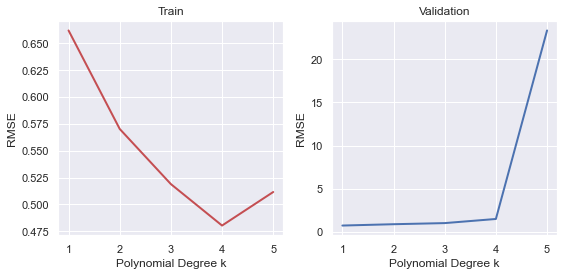

In [29]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(poly_result['param_poly_transform__degree'], -poly_result['mean_train_score'], linewidth=2, color='r')
plt.xticks(np.arange(1,6))
plt.xlabel('Polynomial Degree k')
plt.ylabel('RMSE')
plt.title('Train')

plt.subplot(1,2,2)
plt.plot(poly_result['param_poly_transform__degree'], -poly_result['mean_test_score'], linewidth=2, color='b')
plt.title('Validation')
plt.xticks(np.arange(1,6))
plt.xlabel('Polynomial Degree k')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

In [30]:
gas_X_standard_top6_FS = gas_X_std[:, top6_FS_std]
gas_poly_optimal = Ridge(alpha=0.01, random_state=0, max_iter=3000).fit(PolynomialFeatures(4).fit_transform(gas_X_standard_top6_FS), gas_y_std)

In [31]:
np.argsort(gas_poly_optimal.coef_)[::-1]

array([106, 121, 107, 156, 112, 109,   8,  18, 177, 148,  66,  54, 190,
        36,   3, 188,  37,  58, 129, 126, 149, 127,  40, 181,  17, 159,
       128,  98,  10,  42,  22, 147, 155, 166, 167,  30, 186,  34, 163,
       140,   7, 169,  50, 168, 158,  39,  68,  76,  92,  12,  95, 130,
       100,  44, 123, 154, 194, 189,  24,  14,  61,  62, 115, 143,  63,
       125,  75, 191,  20, 202, 114,  67, 195, 192,  11, 193,  57,  83,
        23,  88,  26, 209,  86,  28,  60,  81, 132,  45, 152,  52,  32,
        47,  53, 151,  82,  46, 185,  84,  80,   5, 203, 170, 103,   0,
       205,  77, 196, 138,  85,  90, 206,  96,  89, 207,  25, 104,  79,
        48,  99, 136, 204, 201, 102, 139, 208, 171, 173,  73,  49, 197,
       137, 118, 187, 172,  93,   4,  74,  78, 174,  33,   6, 120,  72,
        31, 133, 131,  27, 117, 141,  91, 162, 101, 164,  71,  87,  97,
        69,  16, 134, 135, 199,  65, 116, 175, 178, 153, 179,  94,  51,
       119, 160,  38,  59, 200, 142,   1, 176, 198,  29, 150, 18

# Question 15-18

In [32]:
from sklearn.neural_network import MLPRegressor

time_start =time.time()

pipe_NN1 = Pipeline([
    ('model', MLPRegressor(random_state=0, max_iter=3000))
])

param_grid = {
    'model__hidden_layer_sizes': [(x,) for x in np.arange(1, 31)]
}

grid_Q16 = GridSearchCV(pipe_NN1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=False, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True)

grid_Q16.fit(gas_X_std, gas_y_std)
print('\nTime to run code: {}'.format(time.time()-time_start))


Time to run code: 565.9059343338013


In [33]:
nn1_results = pd.DataFrame(grid_Q16.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__hidden_layer_sizes']]
nn1_results = nn1_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
nn1_results.head(10)

mean_test_score  mean_train_score param_model__hidden_layer_sizes
0        -0.642203         -0.555018                            (2,)
1        -0.643465         -0.495905                           (12,)
2        -0.646337         -0.489360                           (22,)
3        -0.648339         -0.543335                            (3,)
4        -0.650583         -0.478697                           (24,)
5        -0.650620         -0.486389                           (23,)
6        -0.651551         -0.528140                            (4,)
7        -0.653598         -0.478205                           (30,)
8        -0.659801         -0.497891                           (14,)
9        -0.661865         -0.522837                            (6,)

In [34]:
time_start =time.time()

pipe_NN2 = Pipeline([
    ('model', MLPRegressor(random_state=0,max_iter=3000))
])
                         
param_grid = {
    'model__hidden_layer_sizes': [(x,) for x in np.arange(1, 31)],
    'model__alpha': [10.0**x for x in np.arange(-3,3)],
    'model__activation': ['logistic', 'tanh', 'relu']   
}

grid_Q17 = GridSearchCV(pipe_NN2, param_grid=param_grid, cv=5, n_jobs=-1, verbose=False, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True)

grid_Q17.fit(gas_X_std, gas_y_std)
print('\nTime to run code: {}'.format(time.time()-time_start))


Time to run code: 6816.208641767502


In [35]:
nn2_results = pd.DataFrame(grid_Q17.cv_results_)[['mean_test_score','mean_train_score','param_model__hidden_layer_sizes', 'param_model__alpha','param_model__activation']]
nn2_results = nn2_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
nn2_results.head(10)

mean_test_score  mean_train_score param_model__hidden_layer_sizes  \
0        -0.617994         -0.565843                            (1,)   
1        -0.619226         -0.565319                            (1,)   
2        -0.620624         -0.509685                            (5,)   
3        -0.621145         -0.568146                            (1,)   
4        -0.621323         -0.509915                            (5,)   
5        -0.625048         -0.503292                           (13,)   
6        -0.627436         -0.506502                           (11,)   
7        -0.627503         -0.573603                            (1,)   
8        -0.627563         -0.496948                           (12,)   
9        -0.630081         -0.482953                           (23,)   

  param_model__alpha param_model__activation  
0               0.01                    tanh  
1              0.001                    tanh  
2              0.001                    tanh  
3                0.1                    tanh  
4               0.01                    tanh  
5               0.01                logistic  
6                0.1                    relu  
7              0.001                logistic  
8               0.01                logistic  
9              0.001                logistic

# Question 19-21

In [36]:
from sklearn.ensemble import RandomForestRegressor

time_start =time.time()

pipe_RF_feature = Pipeline([
    ('model', RandomForestRegressor(random_state=0))
])

param_grid = {
    'model__max_features': np.arange(0.1,1.1,0.1)
}

grid_RF_feature = GridSearchCV(pipe_RF_feature, param_grid=param_grid, cv=5, n_jobs=-1,verbose=False,
                                 scoring='neg_root_mean_squared_error', 
                                 return_train_score=True)

grid_RF_feature.fit(gas_X_std, gas_y_std)

print('\nTime to run code: {}'.format(time.time()-time_start))


Time to run code: 304.5404245853424


In [37]:
rf_feature_results = pd.DataFrame(grid_RF_feature.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__max_features']]
rf_feature_results = rf_feature_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
rf_feature_results.head(10)

mean_test_score  mean_train_score param_model__max_features
0        -0.639867         -0.169924                       0.2
1        -0.643030         -0.167939                       0.3
2        -0.643866         -0.167589                       0.4
3        -0.646198         -0.174815                       0.1
4        -0.647347         -0.168526                       0.7
5        -0.648298         -0.167594                       0.5
6        -0.650363         -0.168305                       0.6
7        -0.653462         -0.169519                       0.9
8        -0.653670         -0.168933                       0.8
9        -0.664410         -0.170604                       1.0

In [38]:
time_start =time.time()

pipe_RF_tree = Pipeline([
    ('model', RandomForestRegressor(max_features=0.2, random_state=0))
])

param_grid = {
    'model__n_estimators': np.arange(100, 400, 20)
}

grid_RF_tree = GridSearchCV(pipe_RF_tree, param_grid=param_grid, cv=5, n_jobs=-1,verbose=False,
                                 scoring='neg_root_mean_squared_error', 
                                 return_train_score=True)

grid_RF_tree.fit(gas_X_std, gas_y_std)

print('\nTime to run code: {}'.format(time.time()-time_start))


Time to run code: 581.1175954341888


In [39]:
rf_tree_results = pd.DataFrame(grid_RF_tree.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__n_estimators']]
rf_tree_results = rf_tree_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
rf_tree_results.head(10)

mean_test_score  mean_train_score param_model__n_estimators
0        -0.631031         -0.169460                       380
1        -0.631292         -0.169808                       360
2        -0.631647         -0.169591                       320
3        -0.631662         -0.169435                       340
4        -0.632138         -0.170549                       260
5        -0.632181         -0.170630                       240
6        -0.632338         -0.170229                       280
7        -0.632401         -0.170036                       300
8        -0.632907         -0.170296                       220
9        -0.633945         -0.170135                       200

In [40]:
time_start =time.time()

pipe_RF_depth = Pipeline([
    ('model', RandomForestRegressor(n_estimators=380, max_features=0.2, random_state=0))
])

param_grid = {
    'model__max_depth': np.arange(1, 31, 1)
}

grid_RF_depth = GridSearchCV(pipe_RF_depth, param_grid=param_grid, cv=5, n_jobs=-1,verbose=False,
                                 scoring='neg_root_mean_squared_error', 
                                 return_train_score=True)

grid_RF_depth.fit(gas_X_std, gas_y_std)

print('\nTime to run code: {}'.format(time.time()-time_start))


Time to run code: 1047.464584350586


In [41]:
rf_depth_results = pd.DataFrame(grid_RF_depth.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__max_depth']]
rf_depth_results = rf_depth_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
rf_depth_results.head(10)

mean_test_score  mean_train_score param_model__max_depth
0        -0.619602         -0.379752                      9
1        -0.620179         -0.352142                     10
2        -0.620611         -0.409316                      8
3        -0.622967         -0.441997                      7
4        -0.623679         -0.326415                     11
5        -0.624967         -0.476951                      6
6        -0.625247         -0.282623                     13
7        -0.628174         -0.303963                     12
8        -0.629200         -0.247627                     15
9        -0.629225         -0.263618                     14

In [42]:
rf_vis = RandomForestRegressor(n_estimators=380, max_features=0.2, max_depth=4, random_state=0, oob_score=True)
rf_vis.fit(gas_X_std, gas_y_std)

RandomForestRegressor(max_depth=4, max_features=0.2, n_estimators=380,
                      oob_score=True, random_state=0)

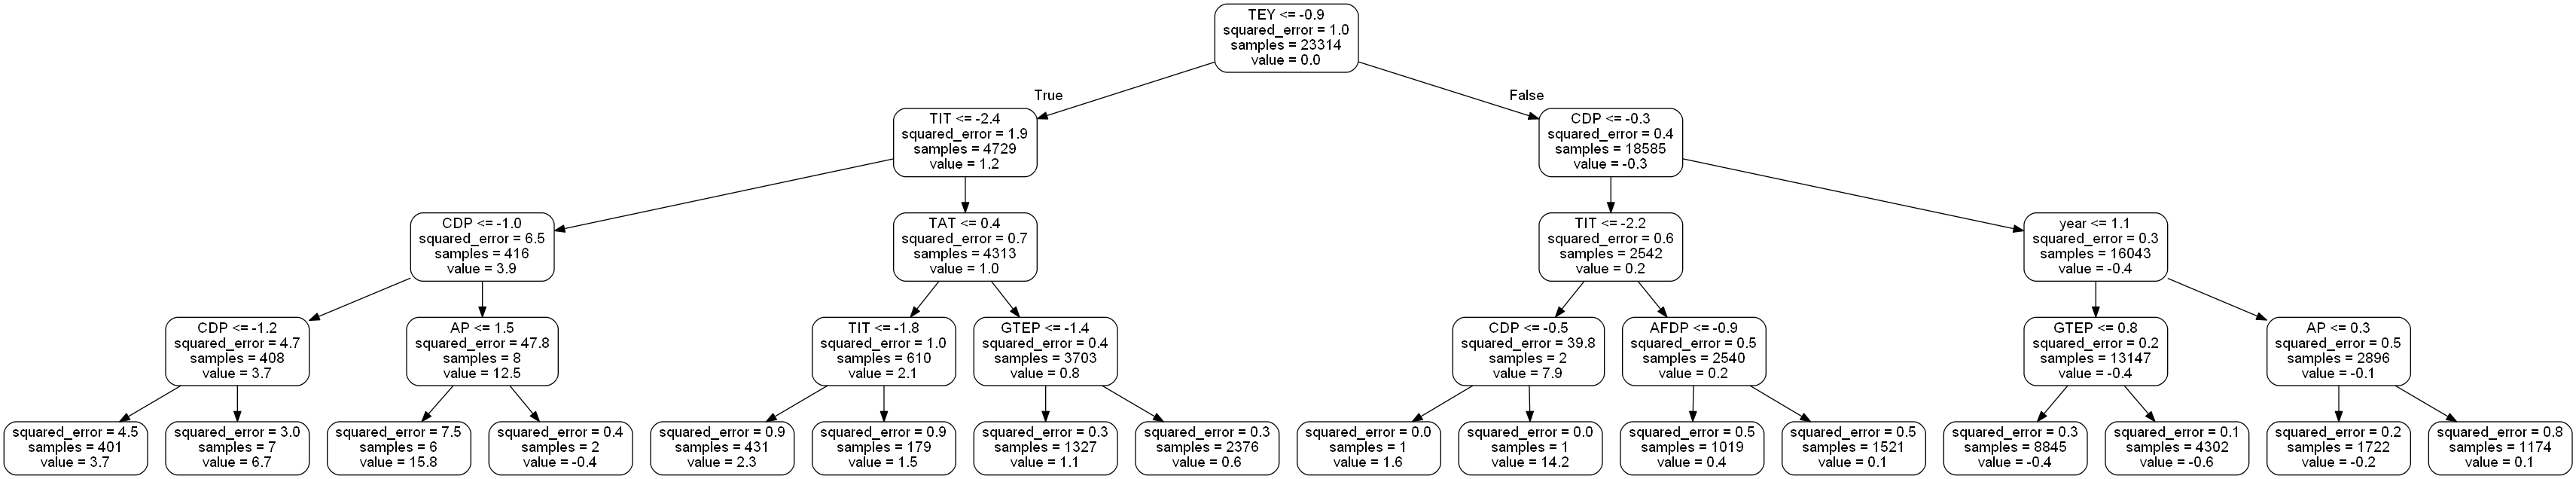

In [43]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

tree = rf_vis.estimators_[1]
export_graphviz(tree, out_file = 'tree.dot', feature_names = gas_X.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# Question 22-24

In [44]:
from skopt import BayesSearchCV
from catboost import CatBoostRegressor
import lightgbm as lgb
import time

In [45]:
time_start =time.time()

opt = BayesSearchCV(
    lgb.LGBMRegressor(random_state=0, n_jobs=-1),
    {
        'boosting_type': ['gbdt', 'dart','rf'],
        'num_leaves': np.arange(10,3000,100),
        'max_depth': [2**i for i in range(5)],
        'n_estimators': np.arange(10,4000,100),
        'reg_alpha': [10.0**x for x in np.arange(-4,2)],
        'reg_lambda': [10.0**x for x in np.arange(-4,2)],
        'subsample': np.arange(0.1,1,0.1),
        'subsample_freq': np.arange(0,20,5),
        'min_split_gain': [10.0**x for x in np.arange(-4,0)]
    },
    n_iter=10,
    cv=5,
    n_jobs=-1,
    verbose=False,
    random_state=0,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

_ = opt.fit(gas_X_std, gas_y_std)

print('\nTime to run code: {}'.format(time.time()-time_start))


Time to run code: 1610.8322372436523


In [46]:
print('Best parameters:',opt.best_params_,',Test RMSE:',opt.best_score_)
print('Train RMSE:',min(opt.cv_results_['mean_train_score']))

Best parameters: OrderedDict([('boosting_type', 'dart'), ('max_depth', 2), ('min_split_gain', 0.01), ('n_estimators', 1110), ('num_leaves', 510), ('reg_alpha', 0.001), ('reg_lambda', 0.0001), ('subsample', 0.1), ('subsample_freq', 0)]) ,Test RMSE: -0.6246734579411667
Train RMSE: -0.5686674919448605


In [47]:
opt_results = pd.DataFrame(opt.cv_results_)[['mean_test_score', 'mean_train_score', 'param_boosting_type', 'param_num_leaves', 'param_max_depth', 'param_n_estimators','param_reg_alpha', 'param_reg_lambda','param_subsample', 'param_subsample_freq','param_min_split_gain']]
opt_results = opt_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
opt_results.head(10)

mean_test_score  mean_train_score param_boosting_type param_num_leaves  \
0        -0.624673         -0.491718                dart              510   
1        -0.646007         -0.481433                  rf              710   
2        -0.646808         -0.477698                gbdt              210   
3        -0.647980         -0.455879                  rf             1010   
4        -0.648067         -0.311199                gbdt              810   
5        -0.654947         -0.310436                dart             2410   
6        -0.686522         -0.275058                gbdt              210   
7        -0.686998         -0.568667                gbdt              710   
8        -0.719937         -0.401206                gbdt             2510   
9        -0.721310         -0.367278                dart             1310   

  param_max_depth param_n_estimators param_reg_alpha param_reg_lambda  \
0               2               1110           0.001           0.0001   
1               8                710             1.0             0.01   
2               4                110           0.001            0.001   
3              16               1910           0.001              1.0   
4              16               2310           0.001              1.0   
5               8               1810             0.1              1.0   
6               4               3110             1.0              1.0   
7               1                710            0.01              0.1   
8               8               2510            10.0            0.001   
9              16               3610             0.1             0.01   

  param_subsample param_subsample_freq param_min_split_gain  
0             0.1                    0                 0.01  
1             0.7                   10                0.001  
2             0.3                    5                 0.01  
3             0.7                    5                 0.01  
4             0.6                    0                  0.1  
5             0.4                    5                0.001  
6             0.5                   10                0.001  
7             0.4                   10                0.001  
8             0.1                   10                 0.01  
9             0.1                    5                 0.01

In [48]:
time_start =time.time()

optcatLG = BayesSearchCV(
    CatBoostRegressor(random_state=0,verbose=1,thread_count=-1,bootstrap_type='Bayesian'), 
    {
        'colsample_bylevel': np.arange(0.1,1,0.1),
        'num_trees': np.arange(10,1000,100),
        'l2_leaf_reg': [10.0**x for x in np.arange(-4,5)],
        'num_leaves': np.arange(10,3000,100),
        'max_depth': [2**i for i in range(5)],
        'bagging_temperature': np.arange(0.1,10,1),
        'grow_policy': ['Lossguide'],
        
    },
    n_iter=10,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=0,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

_ = optcatLG.fit(gas_X_std, gas_y_std)

print('\nTime to run code: {}'.format(time.time()-time_start))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 0.9789660	total: 212ms	remaining: 2m 51s
1:	learn: 0.9587870	total: 241ms	remaining: 1m 37s
2:	learn: 0.9384560	total: 273ms	remaining: 1m 13s
3:	learn: 0.9188323	total: 304ms	remaining: 1m 1s
4:	learn: 0.9002060	total: 331ms	remaining: 53.4s
5:	learn: 0.8818156	total: 356ms	remaining: 47.6s
6:	learn: 0.8643539	total: 379ms	remaining: 43.5s
7:	learn: 0.8476044	total: 407ms	remaining: 40.8s
8:	lear

154:	learn: 0.3605605	total: 5.21s	remaining: 22s
155:	learn: 0.3598434	total: 5.25s	remaining: 22s
156:	learn: 0.3595089	total: 5.28s	remaining: 22s
157:	learn: 0.3590902	total: 5.31s	remaining: 21.9s
158:	learn: 0.3587657	total: 5.35s	remaining: 21.9s
159:	learn: 0.3583505	total: 5.38s	remaining: 21.9s
160:	learn: 0.3580157	total: 5.42s	remaining: 21.8s
161:	learn: 0.3576507	total: 5.45s	remaining: 21.8s
162:	learn: 0.3574298	total: 5.48s	remaining: 21.8s
163:	learn: 0.3571080	total: 5.51s	remaining: 21.7s
164:	learn: 0.3566911	total: 5.54s	remaining: 21.7s
165:	learn: 0.3562115	total: 5.57s	remaining: 21.6s
166:	learn: 0.3558756	total: 5.6s	remaining: 21.6s
167:	learn: 0.3554633	total: 5.64s	remaining: 21.6s
168:	learn: 0.3550468	total: 5.67s	remaining: 21.5s
169:	learn: 0.3543770	total: 5.71s	remaining: 21.5s
170:	learn: 0.3541031	total: 5.75s	remaining: 21.5s
171:	learn: 0.3538250	total: 5.78s	remaining: 21.4s
172:	learn: 0.3533357	total: 5.81s	remaining: 21.4s
173:	learn: 0.35304

314:	learn: 0.3149447	total: 10.6s	remaining: 16.7s
315:	learn: 0.3147157	total: 10.7s	remaining: 16.7s
316:	learn: 0.3144045	total: 10.7s	remaining: 16.6s
317:	learn: 0.3142017	total: 10.7s	remaining: 16.6s
318:	learn: 0.3139885	total: 10.8s	remaining: 16.6s
319:	learn: 0.3138031	total: 10.8s	remaining: 16.5s
320:	learn: 0.3134404	total: 10.8s	remaining: 16.5s
321:	learn: 0.3131706	total: 10.9s	remaining: 16.5s
322:	learn: 0.3129825	total: 10.9s	remaining: 16.5s
323:	learn: 0.3128087	total: 10.9s	remaining: 16.4s
324:	learn: 0.3124063	total: 11s	remaining: 16.4s
325:	learn: 0.3119879	total: 11s	remaining: 16.4s
326:	learn: 0.3118922	total: 11s	remaining: 16.3s
327:	learn: 0.3115295	total: 11.1s	remaining: 16.3s
328:	learn: 0.3113417	total: 11.1s	remaining: 16.2s
329:	learn: 0.3111284	total: 11.1s	remaining: 16.2s
330:	learn: 0.3108826	total: 11.2s	remaining: 16.2s
331:	learn: 0.3104974	total: 11.2s	remaining: 16.2s
332:	learn: 0.3099538	total: 11.3s	remaining: 16.1s
333:	learn: 0.3097

473:	learn: 0.2792127	total: 16.3s	remaining: 11.5s
474:	learn: 0.2788940	total: 16.3s	remaining: 11.5s
475:	learn: 0.2787404	total: 16.4s	remaining: 11.5s
476:	learn: 0.2784108	total: 16.4s	remaining: 11.4s
477:	learn: 0.2782212	total: 16.4s	remaining: 11.4s
478:	learn: 0.2779285	total: 16.5s	remaining: 11.4s
479:	learn: 0.2777281	total: 16.5s	remaining: 11.4s
480:	learn: 0.2774208	total: 16.6s	remaining: 11.3s
481:	learn: 0.2771314	total: 16.6s	remaining: 11.3s
482:	learn: 0.2768774	total: 16.6s	remaining: 11.3s
483:	learn: 0.2765346	total: 16.7s	remaining: 11.2s
484:	learn: 0.2763786	total: 16.7s	remaining: 11.2s
485:	learn: 0.2762247	total: 16.7s	remaining: 11.2s
486:	learn: 0.2761086	total: 16.8s	remaining: 11.1s
487:	learn: 0.2758605	total: 16.8s	remaining: 11.1s
488:	learn: 0.2755923	total: 16.9s	remaining: 11.1s
489:	learn: 0.2755173	total: 16.9s	remaining: 11s
490:	learn: 0.2751490	total: 16.9s	remaining: 11s
491:	learn: 0.2748618	total: 17s	remaining: 11s
492:	learn: 0.274793

632:	learn: 0.2494484	total: 22.4s	remaining: 6.27s
633:	learn: 0.2493174	total: 22.5s	remaining: 6.24s
634:	learn: 0.2491722	total: 22.5s	remaining: 6.2s
635:	learn: 0.2490823	total: 22.5s	remaining: 6.17s
636:	learn: 0.2489932	total: 22.6s	remaining: 6.13s
637:	learn: 0.2488410	total: 22.6s	remaining: 6.09s
638:	learn: 0.2487492	total: 22.6s	remaining: 6.06s
639:	learn: 0.2486342	total: 22.7s	remaining: 6.02s
640:	learn: 0.2484951	total: 22.7s	remaining: 5.99s
641:	learn: 0.2483802	total: 22.8s	remaining: 5.95s
642:	learn: 0.2481489	total: 22.8s	remaining: 5.92s
643:	learn: 0.2480516	total: 22.8s	remaining: 5.88s
644:	learn: 0.2478041	total: 22.9s	remaining: 5.85s
645:	learn: 0.2476493	total: 22.9s	remaining: 5.81s
646:	learn: 0.2474576	total: 22.9s	remaining: 5.78s
647:	learn: 0.2473224	total: 23s	remaining: 5.74s
648:	learn: 0.2471865	total: 23s	remaining: 5.71s
649:	learn: 0.2470507	total: 23.1s	remaining: 5.67s
650:	learn: 0.2469317	total: 23.1s	remaining: 5.64s
651:	learn: 0.246

794:	learn: 0.2263044	total: 28.6s	remaining: 539ms
795:	learn: 0.2262198	total: 28.6s	remaining: 503ms
796:	learn: 0.2261362	total: 28.7s	remaining: 467ms
797:	learn: 0.2259330	total: 28.7s	remaining: 431ms
798:	learn: 0.2257436	total: 28.7s	remaining: 396ms
799:	learn: 0.2255565	total: 28.8s	remaining: 360ms
800:	learn: 0.2254234	total: 28.8s	remaining: 324ms
801:	learn: 0.2253304	total: 28.8s	remaining: 288ms
802:	learn: 0.2252369	total: 28.9s	remaining: 252ms
803:	learn: 0.2250834	total: 28.9s	remaining: 216ms
804:	learn: 0.2249213	total: 28.9s	remaining: 180ms
805:	learn: 0.2248177	total: 29s	remaining: 144ms
806:	learn: 0.2247051	total: 29s	remaining: 108ms
807:	learn: 0.2245930	total: 29.1s	remaining: 72ms
808:	learn: 0.2244670	total: 29.1s	remaining: 36ms
809:	learn: 0.2243861	total: 29.1s	remaining: 0us

Time to run code: 190.76389837265015


In [49]:
print('Best parameters:',optcatLG.best_params_,',Test RMSE:',optcatLG.best_score_)
print('Train RMSE:',min(optcatLG.cv_results_['mean_train_score']))

Best parameters: OrderedDict([('bagging_temperature', 1.1), ('colsample_bylevel', 0.7000000000000001), ('grow_policy', 'Lossguide'), ('l2_leaf_reg', 1.0), ('max_depth', 8), ('num_leaves', 2010), ('num_trees', 810)]) ,Test RMSE: -0.6394231477362334
Train RMSE: -0.8745357610627271


In [50]:
optcatLG_results = pd.DataFrame(optcatLG.cv_results_)[['mean_test_score', 'mean_train_score', 'param_colsample_bylevel', 'param_num_trees', 'param_l2_leaf_reg', 'param_num_leaves', 'param_max_depth', 'param_bagging_temperature', 'param_grow_policy']]
optcatLG_results = optcatLG_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
optcatLG_results.head(10)

mean_test_score  mean_train_score param_colsample_bylevel param_num_trees  \
0        -0.639423         -0.206560                     0.7             810   
1        -0.643794         -0.531845                     0.9             810   
2        -0.643927         -0.518332                     0.9             710   
3        -0.644305         -0.555605                     0.7             410   
4        -0.644547         -0.489621                     0.6             110   
5        -0.666602         -0.579446                     0.1             610   
6        -0.675929         -0.579339                     0.8             310   
7        -0.676874         -0.592254                     0.5             710   
8        -0.697048         -0.651302                     0.5             110   
9        -0.896133         -0.874536                     0.3              10   

  param_l2_leaf_reg param_num_leaves param_max_depth  \
0               1.0             2010               8   
1               1.0              810               2   
2              10.0              510               2   
3             0.001             2510               2   
4              10.0             2810               8   
5              0.01             1010               2   
6            1000.0             1610               4   
7             100.0             2210               1   
8            0.0001              710               1   
9              0.01              710               2   

  param_bagging_temperature param_grow_policy  
0                       1.1         Lossguide  
1                       8.1         Lossguide  
2                       2.1         Lossguide  
3                       9.1         Lossguide  
4                       5.1         Lossguide  
5                       5.1         Lossguide  
6                       1.1         Lossguide  
7                       3.1         Lossguide  
8                       5.1         Lossguide  
9                       2.1         Lossguide

# Question 26

In [51]:
rf_optim = RandomForestRegressor(n_estimators=380, max_features=0.2, max_depth=9, random_state=0, oob_score=True)
rf_optim.fit(gas_X_std, gas_y_std)

RandomForestRegressor(max_depth=9, max_features=0.2, n_estimators=380,
                      oob_score=True, random_state=0)

In [52]:
print('Optimal Random Forest Regression Model:')
print('R^2 score: %.4f,\nOOB score: %.4f.' %(rf_optim.score(gas_X_std, gas_y_std), rf_optim.oob_score_))

Optimal Random Forest Regression Model:
R^2 score: 0.8458,
OOB score: 0.7526.
